In [1]:
import pyrosetta

In [3]:
from pyrosetta import *
init()

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python39.m1 r384 2024.24+release.ca096dac4f ca096dac4f43ee5ee195

In [16]:
import requests
import pyrosetta
from pyrosetta import pose_from_pdb
from pyrosetta.toolbox import cleanATOM
import os

# Initialize PyRosetta
pyrosetta.init()

# Define PDB ID and paths
pdb_id = "5TJ3"
pdb_url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
pdb_filename = f"inputs/{pdb_id}.pdb"
cleaned_pdb_filename = f"inputs/cleaned_{pdb_id}.pdb"

# Create inputs directory if it doesn't exist
if not os.path.exists("inputs"):
    os.makedirs("inputs")

# Download the PDB file from the RCSB PDB
response = requests.get(pdb_url)
if response.status_code == 200:
    with open(pdb_filename, 'wb') as file:
        file.write(response.content)
    print(f"Successfully downloaded {pdb_id}.pdb")
else:
    print(f"Failed to download {pdb_id}.pdb")
    raise Exception("Failed to download PDB file")

# Clean the PDB file with an explicit output path
cleaned_pdb_output = f"{pdb_id}_clean.pdb"
cleanATOM(pdb_filename, cleaned_pdb_output)

# Move the cleaned PDB file to the expected directory
os.rename(cleaned_pdb_output, cleaned_pdb_filename)

# Load the original PDB file into PyRosetta
pose = pose_from_pdb(pdb_filename)

# Load the cleaned PDB file into PyRosetta
pose_clean = pose_from_pdb(cleaned_pdb_filename)

# Print annotated sequences for both poses
print(f"Annotated sequence for original PDB {pdb_id}:")
original_sequence = pose.annotated_sequence()
print(original_sequence)
print("\nAnnotated sequence for cleaned PDB {pdb_id}:")
cleaned_sequence = pose_clean.annotated_sequence()
print(cleaned_sequence)

# Function to find differences between sequences
def find_sequence_differences(seq1, seq2):
    differences = []
    length = min(len(seq1), len(seq2))
    for i in range(length):
        if seq1[i] != seq2[i]:
            differences.append((i, seq1[i], seq2[i]))
    if len(seq1) > length:
        for i in range(length, len(seq1)):
            differences.append((i, seq1[i], '-'))
    if len(seq2) > length:
        for i in range(length, len(seq2)):
            differences.append((i, '-', seq2[i]))
    return differences

# Find and print differences between the original and cleaned sequences
differences = find_sequence_differences(original_sequence, cleaned_sequence)
print("\nDifferences between original and cleaned sequences:")
for index, original_residue, cleaned_residue in differences:
    print(f"Position {index}: Original={original_residue} Cleaned={cleaned_residue}")

# Print basic information about the loaded poses
print(f"\nSuccessfully loaded PDB {pdb_id}")
print(f"Number of residues in original pose: {pose.total_residue()}")
print(f"Number of residues in cleaned pose: {pose_clean.total_residue()}")
print(f"Pose sequence (original): {pose.sequence()}")
print(f"Pose sequence (cleaned): {pose_clean.sequence()}")

# Retrieve and print information about residue 24 for both poses
res_24_original = pose.residue(24)
res_24_clean = pose_clean.residue(24)

print("\nOriginal PDB Residue 24:")
print(f"Name: {res_24_original.name()}")
print(f"Is charged: {res_24_original.is_charged()}")

print("\nCleaned PDB Residue 24:")
print(f"Name: {res_24_clean.name()}")
print(f"Is charged: {res_24_clean.is_charged()}")




┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python39.m1 2024.24+release.ca096dac4f43ee5ee195f87f3703a520fcf60cf9 2024-06-14T16:57:57] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python39.m1 r384 2024.24+release.ca096dac4f ca096dac4f43ee5ee195

Successfully downloaded 5TJ3.pdb


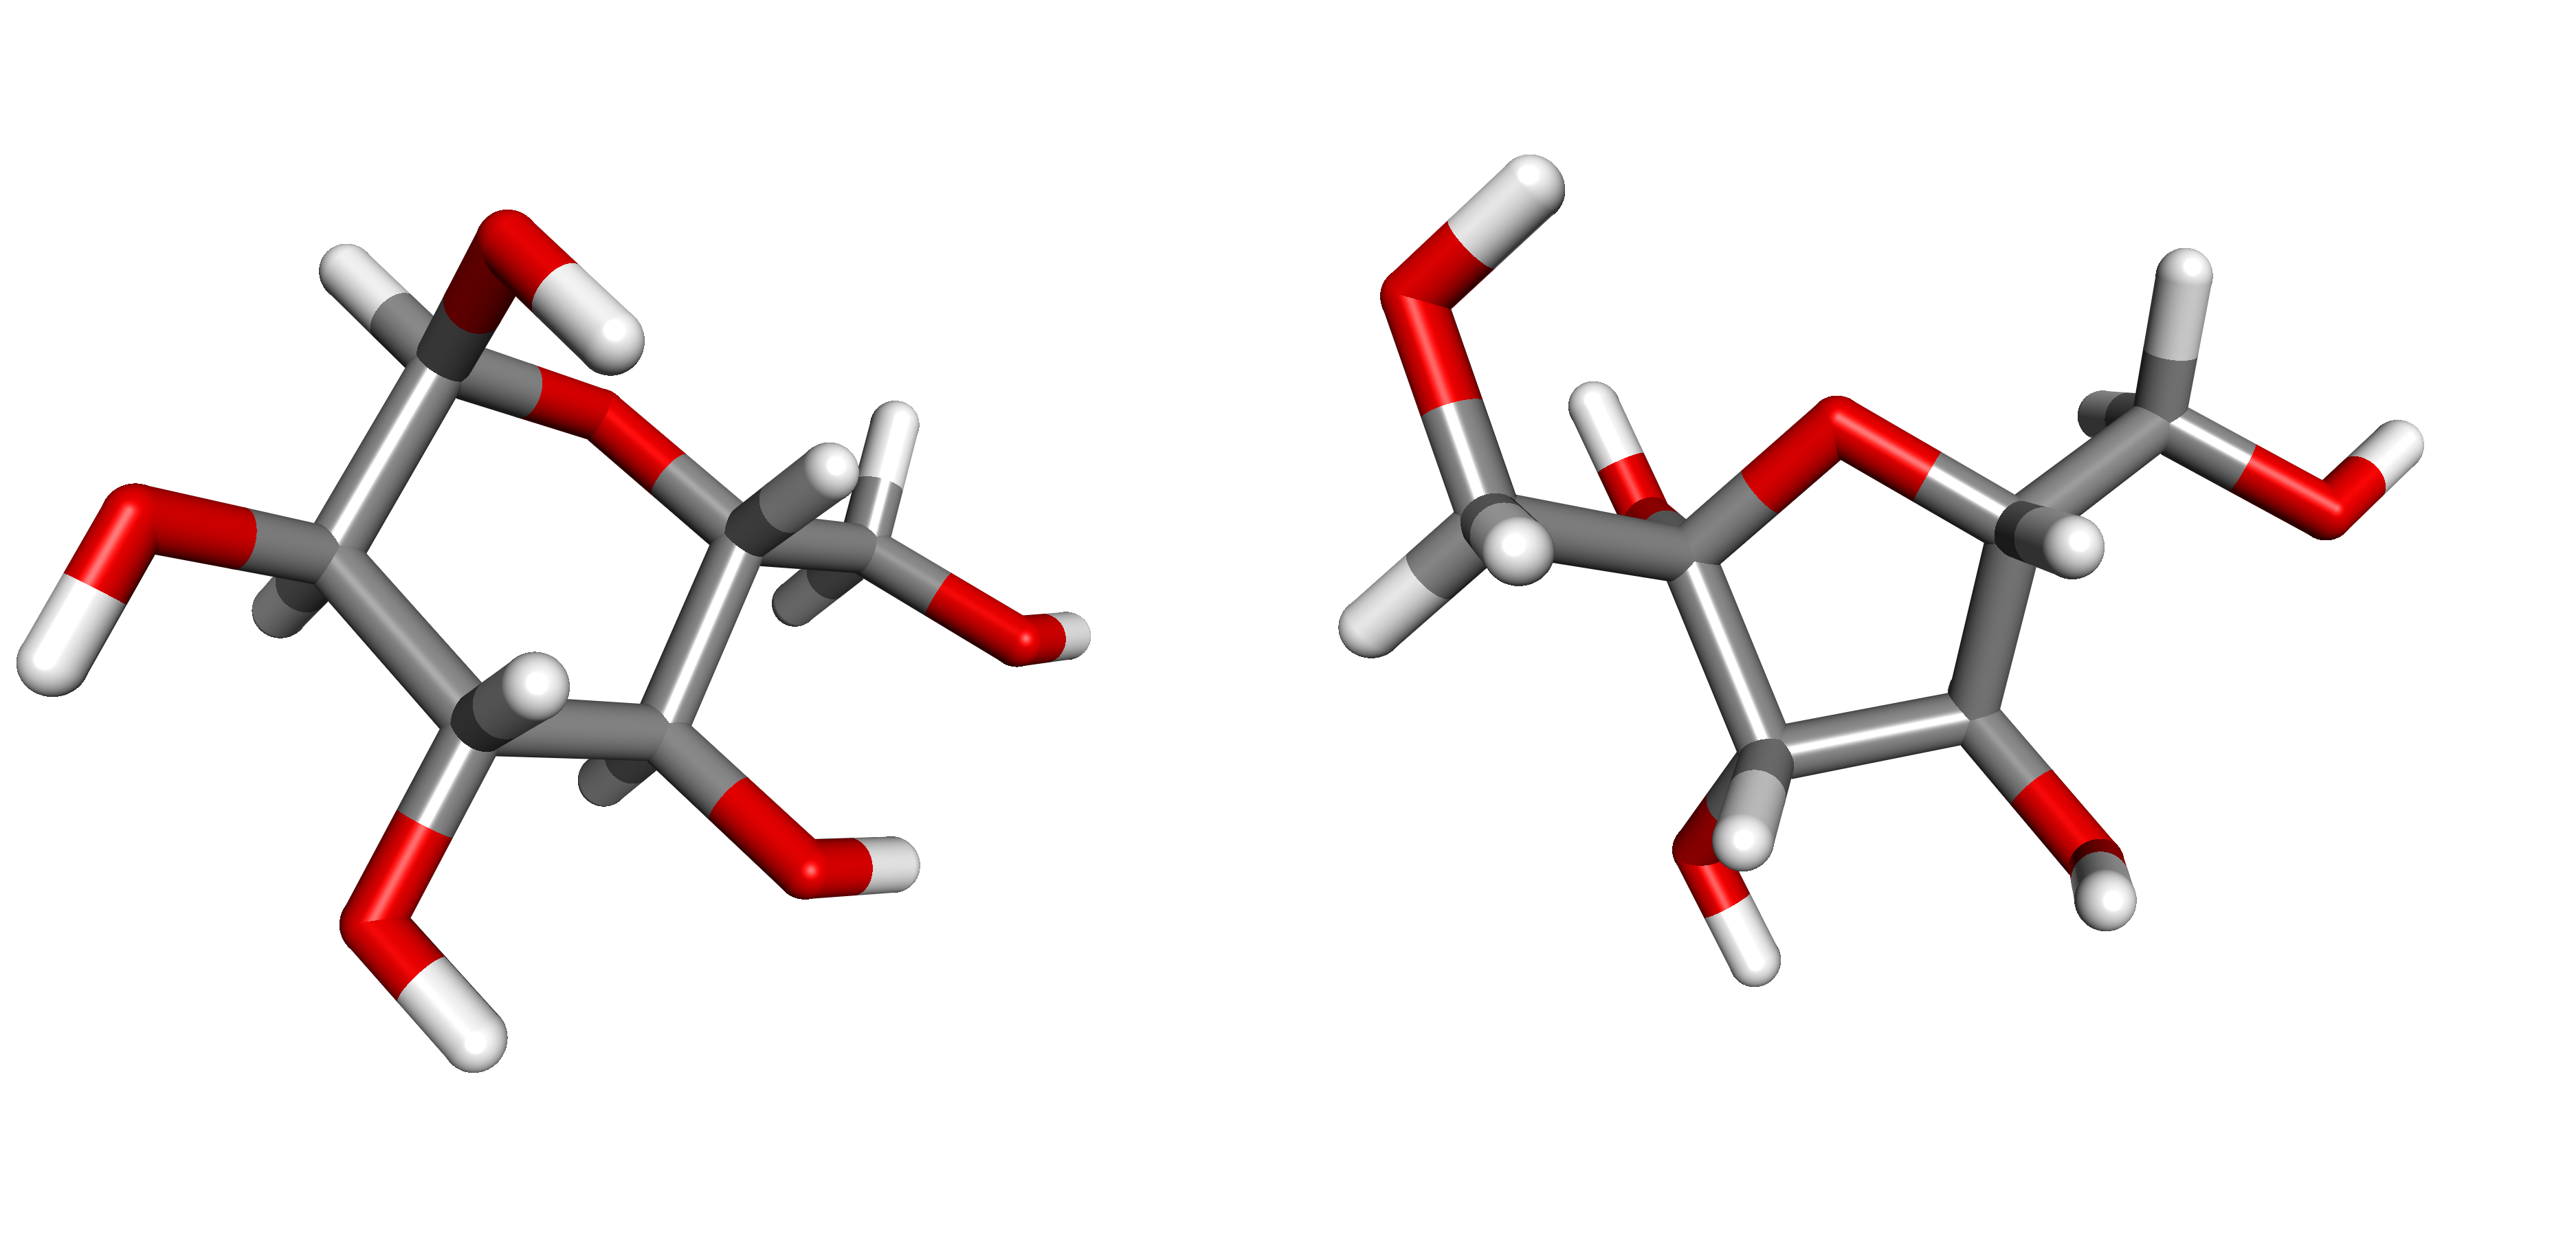

In [19]:
import requests
import os
from IPython.display import Image

# Define PDB ID and paths
pdb_id = "5TJ3"
pdb_url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
pdb_filename = f"inputs/{pdb_id}.pdb"

# Create inputs directory if it doesn't exist
if not os.path.exists("inputs"):
    os.makedirs("inputs")

# Download the PDB file from the RCSB PDB
response = requests.get(pdb_url)
if response.status_code == 200:
    with open(pdb_filename, 'wb') as file:
        file.write(response.content)
    print(f"Successfully downloaded {pdb_id}.pdb")
else:
    print(f"Failed to download {pdb_id}.pdb")
    raise Exception("Failed to download PDB file")

# Display an image
display(Image('./pyr.png', width=500))
